In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# 데이터 로드
df = pd.read_csv('./encoded_data.csv')

# change_date 열을 제외한 나머지 열 선택
X = df.drop(columns=['change_date'])
y = df['change_date'].values  # 예측값

# 결측값 처리 (예: 평균값으로 대체)
X.replace('-', np.nan, inplace=True)
X = X.astype(np.float32)
X.fillna(X.mean(), inplace=True)

y = y.astype(np.float32)

# train/test 데이터셋 나누기 (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# train 데이터셋의 일부를 다시 train(sub)/val 데이터셋으로 나누기 (80% sub(train), 20% val)
X_sub, X_val, y_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

# 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_sub = scaler.transform(X_sub)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

C:\Users\user\AppData\Local\Temp\ipykernel_16488\449066250.py:10: DtypeWarning: Columns (4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./encoded_data.csv')


Epoch 1/100
42/42 [==============================] - 1s 7ms/step - loss: 239.1508 - mean_absolute_error: 13.1688 - val_loss: 27.4536 - val_mean_absolute_error: 3.2727
Epoch 2/100
42/42 [==============================] - 0s 3ms/step - loss: 26.8466 - mean_absolute_error: 3.6660 - val_loss: 6.4423 - val_mean_absolute_error: 2.0140
Epoch 3/100
42/42 [==============================] - 0s 3ms/step - loss: 13.7400 - mean_absolute_error: 2.7765 - val_loss: 2.8149 - val_mean_absolute_error: 1.3016
Epoch 4/100
42/42 [==============================] - 0s 3ms/step - loss: 10.9549 - mean_absolute_error: 2.5318 - val_loss: 2.5673 - val_mean_absolute_error: 1.3485
Epoch 5/100
42/42 [==============================] - 0s 3ms/step - loss: 9.8920 - mean_absolute_error: 2.4502 - val_loss: 1.2709 - val_mean_absolute_error: 0.8939
Epoch 6/100
42/42 [==============================] - 0s 3ms/step - loss: 8.6205 - mean_absolute_error: 2.2923 - val_loss: 1.6489 - val_mean_absolute_error: 1.0357
Epoch 7/100
42/

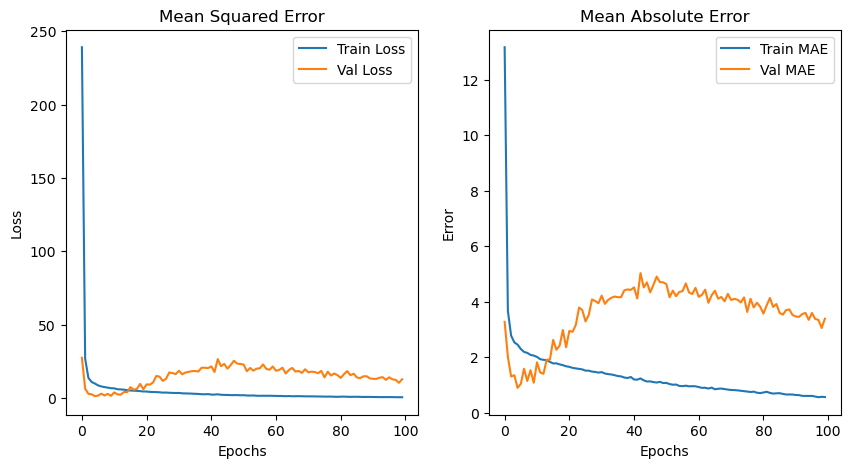

41/41 [==============================] - 0s 1ms/step - loss: 12.6182 - mean_absolute_error: 3.3515
Test Loss: 12.618151664733887
Test MAE: 3.3514516353607178
33/33 [==============================] - 0s 1ms/step - loss: 12.8004 - mean_absolute_error: 3.3848
Validation Loss: 12.800427436828613
Validation MAE: 3.384782314300537
33/33 [==============================] - 0s 1ms/step
R2 Score: 0.278465211391449


In [5]:
# 모델 생성 - Dropout 추가
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_dim=X.shape[1], activation='relu'),
    tf.keras.layers.Dropout(0.2),  # 50% 드롭아웃 추가 
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # 50% 드롭아웃 추가
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# 모델 학습
history = model.fit(X_sub, y_sub, validation_data=(X_val, y_val), epochs=100, batch_size=100)#, callbacks=[early_stopping])

# 학습 결과 시각화 (학습 곡선 시각화)
plt.figure(figsize=(10, 5))

# subplot 1: Mean Squared Error 손실 함수의 변화
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# subplot 2: Mean Absolute Error 매트릭스의 변화
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Val MAE')
plt.title('Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()

plt.show()

# 모델 평가 - 테스트 데이터셋 사용
loss_test, mae_test = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss_test}')
print(f'Test MAE: {mae_test}')

# 모델 평가 - 검증 데이터셋 사용
loss_val, mae_val = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss_val}')
print(f'Validation MAE: {mae_val}')

# 예측값 생성
predictions = model.predict(X_val)

# 결정계수 계산
r2 = r2_score(y_val, predictions)
print(f'R2 Score: {r2}')
